In [1]:
import sys
sys.path.append('../scripts')
from sklearn.linear_model import LinearRegression
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()


# Exclude outliers
X_filtered, y_filtered, outliers = exclude_outliers(X, y)

param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False],
}
linear_regression = LinearRegression()

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



6-fold
Fitting 6 folds for each of 16 candidates, totalling 96 fits
Best Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
R squared (CV): 0.0898329703253905
Average MSE (CV): 109.03161000659769
Average RMSE (CV): 10.441820243932458
Average MAE (CV): 5.605285236129881


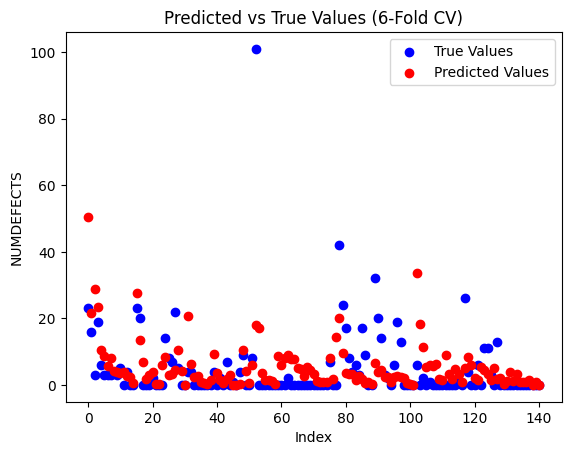

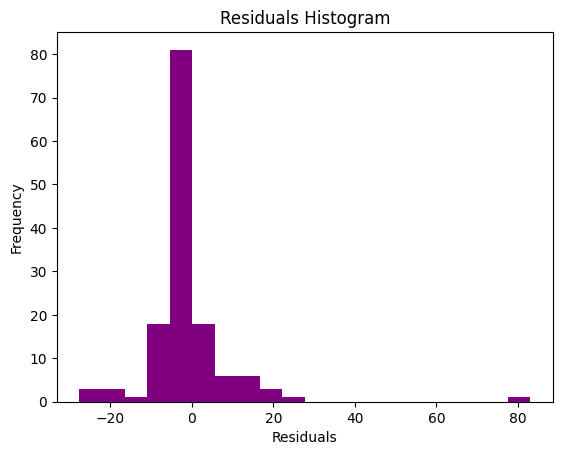

In [2]:
print('\n6-fold')
k_fold_results = k_fold_cv(X, y, linear_regression, 6, param_grid=param_grid_lr)

In [4]:
best_param = {
    'copy_X': True,
    'fit_intercept': False,
    'n_jobs': 1,
    'positive': True
}
linear_regression_tuned = LinearRegression(**best_param)

LOOCV
R squared (LOOCV): 0.20019981937896802
Average MSE (LOOCV): 95.81043757194165
Average RMSE (LOOCV): 9.788280623885976
Average MAE (LOOCV): 5.040101513571757


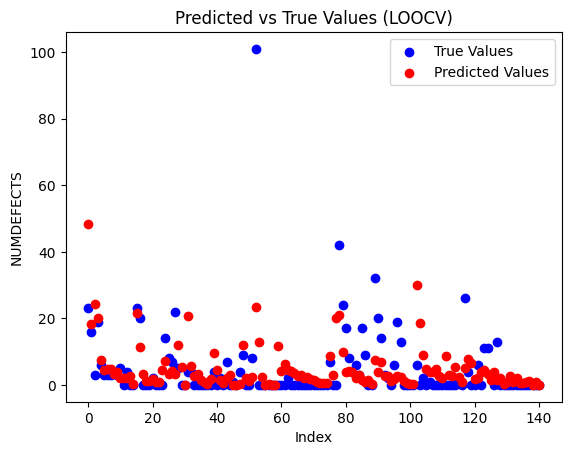

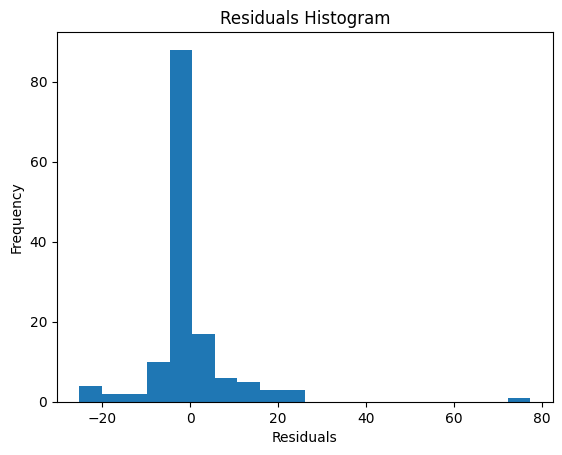

In [4]:
print('LOOCV')
loocv_results = loocv(X, y, linear_regression_tuned)

In [5]:
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric      LOOCV      6-Fold
0     R2   0.200200   -0.226755
1    MSE  95.810438  108.304126
2   RMSE   9.788281   10.406927
3    MAE   5.040102    5.605358


LOOCV
R squared (LOOCV): 0.21876065485894858
Average MSE (LOOCV): 32.437925600154465
Average RMSE (LOOCV): 5.695430238371326
Average MAE (LOOCV): 4.030287638903227


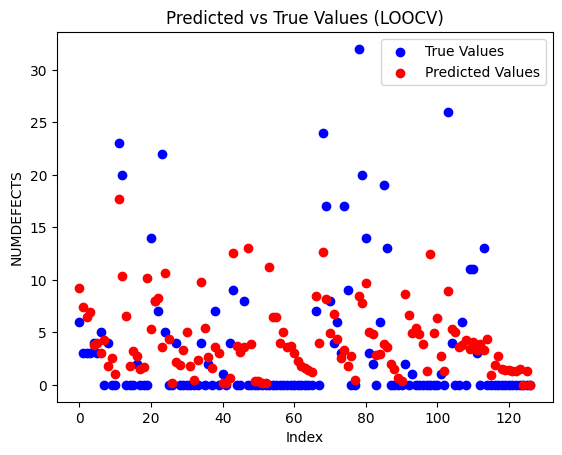

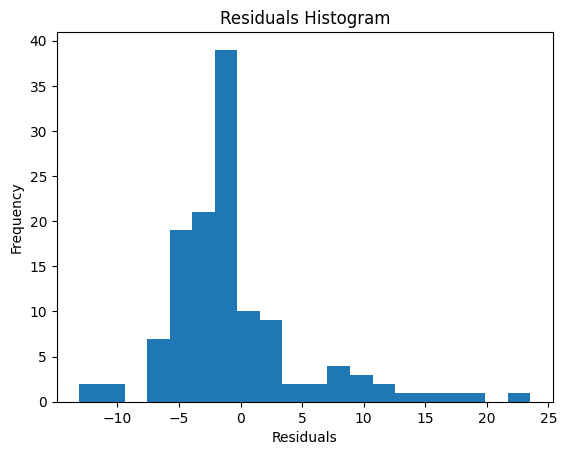


6-fold
Fitting 6 folds for each of 16 candidates, totalling 96 fits
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
R squared (CV): 0.15228433740666292
Average MSE (CV): 35.19809615876882
Average RMSE (CV): 5.932798341319956
Average MAE (CV): 4.20039088551828


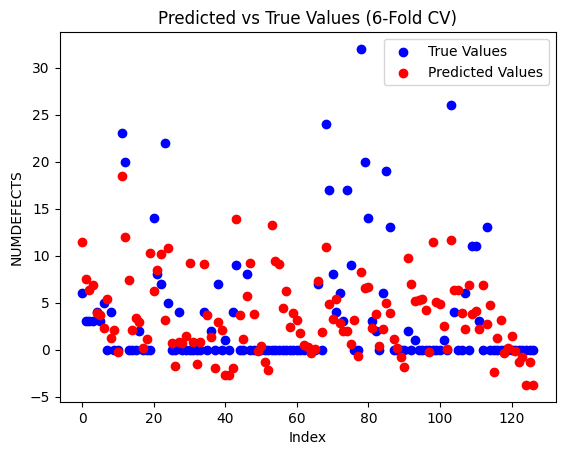

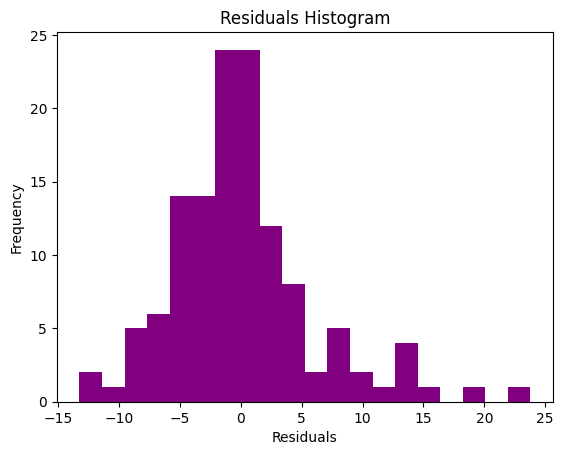

In [5]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, linear_regression_tuned)

print('\n6-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, linear_regression, 6, param_grid=param_grid_lr)

In [7]:
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '6-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV     6-Fold
0     R2   0.218761  -0.522000
1    MSE  32.437926  35.315858
2   RMSE   5.695430   5.942715
3    MAE   4.030288   4.205807
